In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/ศลปหถก
%cp -av Datasets /content/datasets

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import numpy as np

### Analysis Datasets I

Subfolder: Not_EarCancer, Image Count: 581
Subfolder: EarCancer, Image Count: 0
Subfolder: Carcinoma, Image Count: 0
Subfolder: Basal carcinoma, Image Count: 213
Subfolder: Squamous carcinoma, Image Count: 186
Subfolder: Melanoma, Image Count: 210


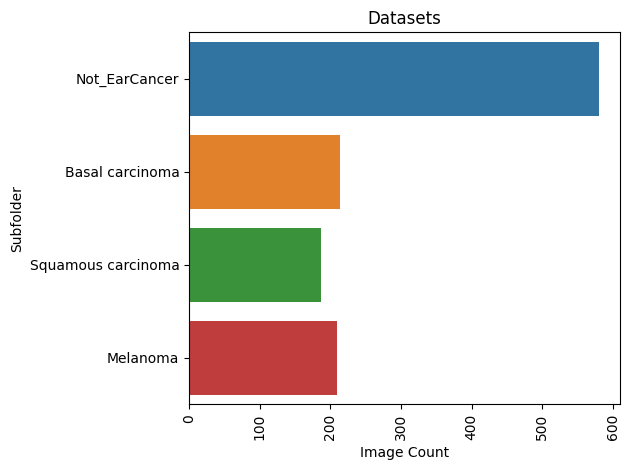

Pie Chart


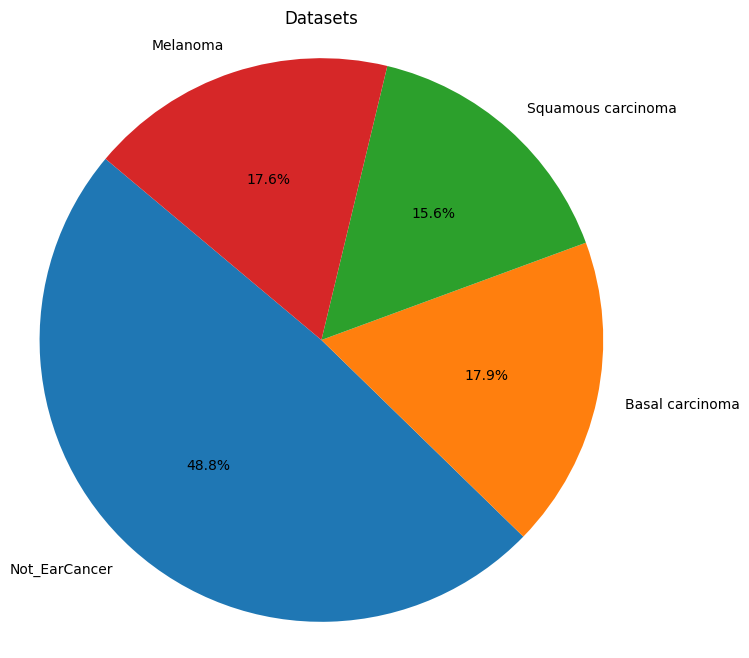

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
subfolder_names = []
image_counts = []
def count_images_in_folder(folder_path):
    image_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
    return image_count

def count_images_in_subfolders(parent_folder):


    for folder_name in os.listdir(parent_folder):

        subfolder_path = os.path.join(parent_folder, folder_name)

        if os.path.isdir(subfolder_path):
            image_count = count_images_in_folder(subfolder_path)

            subfolder_names.append(folder_name)
            image_counts.append(image_count)

            print(f"Subfolder: {folder_name}, Image Count: {image_count}")

            count_images_in_subfolders(subfolder_path)

    return subfolder_names, image_counts

main_folder = "/content/datasets"

subfolder_names, image_counts = count_images_in_subfolders(main_folder)

target_class = ["EarCancer","Carcinoma"]
for i in target_class:
  if i in subfolder_names:
      index_to_drop = subfolder_names.index(i)
      subfolder_names.pop(index_to_drop)
      image_counts.pop(index_to_drop)

sns.barplot(x=image_counts, y=subfolder_names)

plt.xlabel("Image Count")
plt.ylabel("Subfolder")
plt.title("Datasets")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("Pie Chart")
plt.figure(figsize=(8, 8))
plt.pie(image_counts, labels=subfolder_names, autopct="%1.1f%%", startangle=140)
plt.title("Datasets")
plt.axis("equal")
plt.show()


In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
subfolder_names = []
image_counts = []
main_lst = []
count_main_lst = []
def count_images_in_folder(folder_path):
    image_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
    return image_count

def count_images_in_subfolders(parent_folder):


    for folder_name in os.listdir(parent_folder):

        subfolder_path = os.path.join(parent_folder, folder_name)

        if os.path.isdir(subfolder_path):
            image_count = count_images_in_folder(subfolder_path)

            subfolder_names.append(folder_name)
            image_counts.append(image_count)

            print(f"Subfolder: {folder_name}, Image Count: {image_count}")

            count_images_in_subfolders(subfolder_path)

    return subfolder_names, image_counts

main_folder = "/content/datasets"

subfolder_names, image_counts = count_images_in_subfolders(main_folder)

target_class = ["EarCancer","Carcinoma"]
for i in target_class:
  if i in subfolder_names:
      index_to_drop = subfolder_names.index(i)
      subfolder_names.pop(index_to_drop)
      image_counts.pop(index_to_drop)
main_lst.append("Not_EarCancer")
main_lst.append("EarCancer")
count_main_lst.append(image_counts[0])
count_main_lst.append(sum(image_counts[1:]))
# Create a bar plot using Seaborn
sns.barplot(x=count_main_lst, y=main_lst, palette=['lightblue', 'salmon'])

plt.xlabel("Image Count")
plt.ylabel("Subfolder")
plt.title("Datasets")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


print("Pie chart")
plt.figure(figsize=(8, 8))
plt.pie(count_main_lst, labels=main_lst, autopct="%1.1f%%", colors=['lightblue', 'salmon'], startangle=140)
plt.title("Datasets")
plt.axis("equal")
plt.show()

### Clean the data I

In [ ]:
import os

directory_path = ['/content/datasets/Not_EarCancer','/content/datasets/EarCancer/Melanoma','/content/datasets/EarCancer/Carcinoma/Basal carcinoma','/content/datasets/EarCancer/Carcinoma/Squamous carcinoma']
new_filename = ['Not_EarCancer','Melanoma','Basal_carcinoma','Squamous_carcinoma']
def rename_thefile(directory,file_name):
  new_filename = file_name
  i = 0
  # List all files in the directory
  file_list = os.listdir(directory)

  # Rename each file to "Not_EarCancer"
  for filename in file_list:
      i+=1
      src = os.path.join(directory, filename)
      dst = os.path.join(directory, new_filename+">"+str(i))
      os.rename(src, dst)
j=0
for directory in directory_path:
  rename_thefile(directory,new_filename[j])
  j+=1


### Split folder to Each sets

In [ ]:
def move_folder(source_folder, destination_folder):
    try:
        shutil.move(source_folder, destination_folder)
        print(f"Moved '{source_folder}' to '{destination_folder}'.")
    except Exception as e:
        print(f"Error: {e}")

source_folder_path = ["/content/datasets/EarCancer/Melanoma","/content/datasets/EarCancer/Carcinoma/Squamous carcinoma","/content/datasets/EarCancer/Carcinoma/Basal carcinoma"]
for i in source_folder_path:
  destination_folder_path = "/content/datasets"

  move_folder(i, destination_folder_path)

import shutil

def delete_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Deleted folder: {folder_path}")
    except Exception as e:
        print(f"Error: {e}")

folder_to_delete = "/content/datasets/EarCancer"
delete_folder(folder_to_delete)


Moved '/content/datasets/EarCancer/Melanoma' to '/content/datasets'.
Moved '/content/datasets/EarCancer/Carcinoma/Squamous carcinoma' to '/content/datasets'.
Moved '/content/datasets/EarCancer/Carcinoma/Basal carcinoma' to '/content/datasets'.
Deleted folder: /content/datasets/EarCancer


In [ ]:
import os

base_dir = '/content/datasets'

for root, dirs, files in os.walk(base_dir):
    for dir_name in dirs:
        if " " in dir_name:
            new_dir_name = dir_name.replace(" ", "_")
            src_dir = os.path.join(root, dir_name)
            dst_dir = os.path.join(root, new_dir_name)
            os.rename(src_dir, dst_dir)


In [ ]:
import os
import shutil

base_dir = '/content/DATASETS'
train_dir = '/content/DATASETS/train'
valid_dir = '/content/DATASETS/valid'
test_dir = '/content/DATASETS/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [ ]:
import os
import random
import shutil

def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

base_dir = '/content/DATASETS'
train_dir = '/content/DATASETS/train'
valid_dir = '/content/DATASETS/valid'
test_dir = '/content/DATASETS/test'

create_directory_if_not_exists(train_dir)
create_directory_if_not_exists(valid_dir)
create_directory_if_not_exists(test_dir)

def split_data(source_dir, target_train_dir, target_valid_dir, target_test_dir, split_ratio=(0.6, 0.1, 0.3)):
    classes = os.listdir(source_dir)
    for class_name in classes:
        class_path = os.path.join(source_dir, class_name)
        files = os.listdir(class_path)
        random.shuffle(files)

        train_split = int(len(files) * split_ratio[0])
        valid_split = int(len(files) * split_ratio[1])

        train_files = files[:train_split]
        valid_files = files[train_split:train_split + valid_split]
        test_files = files[train_split + valid_split:]

        for file in train_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(target_train_dir, class_name, file)
            create_directory_if_not_exists(os.path.dirname(dst_path))
            shutil.copy(src_path, dst_path)

        for file in valid_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(target_valid_dir, class_name, file)
            create_directory_if_not_exists(os.path.dirname(dst_path))
            shutil.copy(src_path, dst_path)

        for file in test_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(target_test_dir, class_name, file)
            create_directory_if_not_exists(os.path.dirname(dst_path))
            shutil.copy(src_path, dst_path)

# Define the source directory and call the split_data function
source_dir = '/content/datasets'
split_data(source_dir, train_dir, valid_dir, test_dir)


### Analysis II

['train', 'Melanoma', 'Basal_carcinoma', 'Not_EarCancer', 'Squamous_carcinoma']
[0, 126, 124, 348, 73]


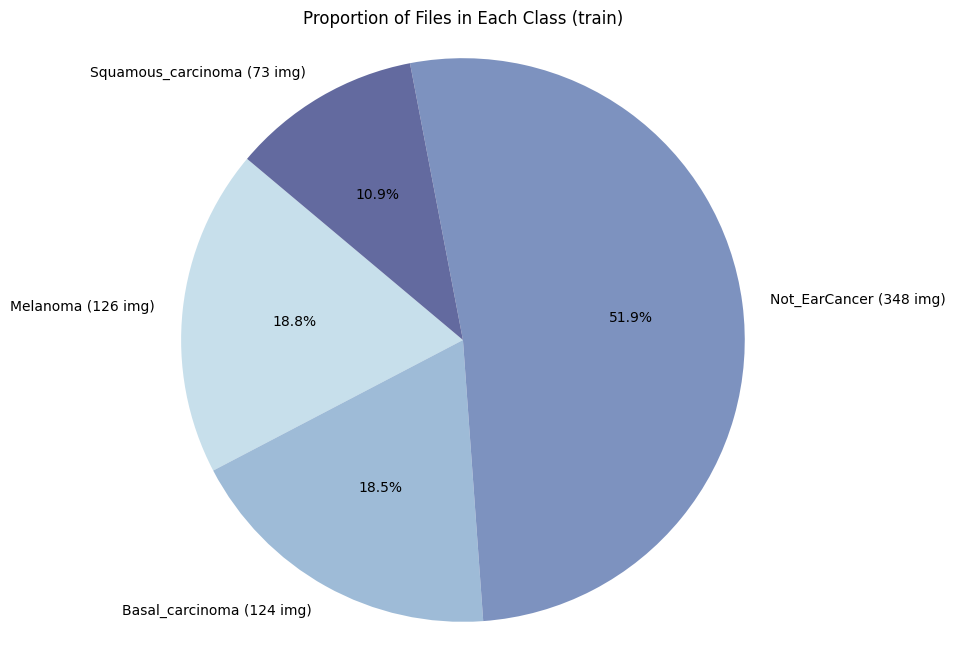

['valid', 'Melanoma', 'Basal_carcinoma', 'Not_EarCancer', 'Squamous_carcinoma']
[0, 21, 20, 58, 12]


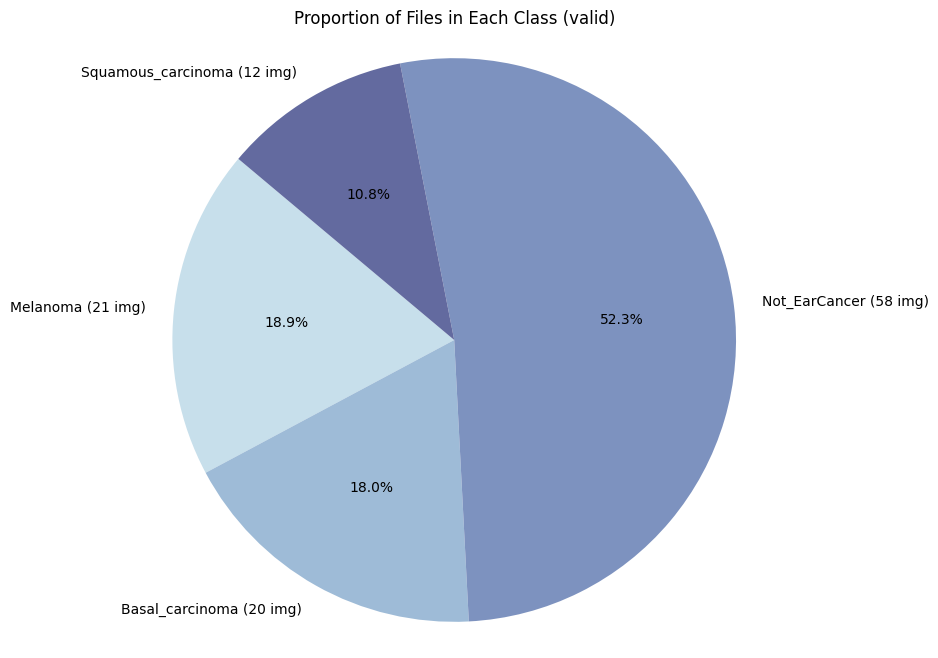

['test', 'Melanoma', 'Basal_carcinoma', 'Not_EarCancer', 'Squamous_carcinoma']
[0, 63, 64, 175, 38]


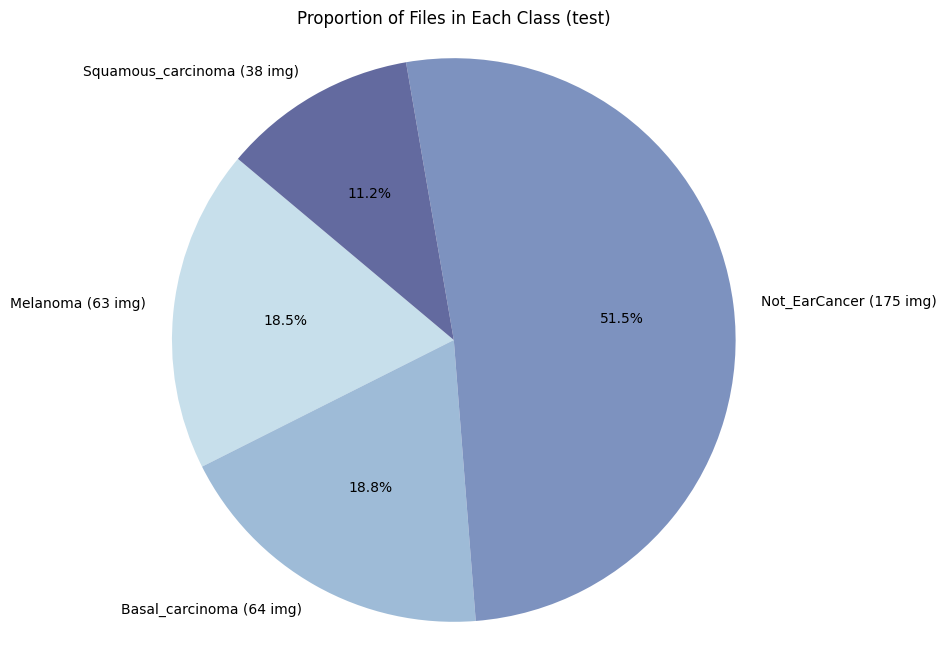

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

dir = ['/content/DATASETS/train','/content/DATASETS/valid','/content/DATASETS/test']
def plot(dir):
  def count_files_in_subfolders(directory):
      count_per_folder = {}
      for root, dirs, files in os.walk(directory):
          class_name = os.path.basename(root)
          count = len(files)
          count_per_folder[class_name] = count
      return count_per_folder



  folder_file_counts = count_files_in_subfolders(dir)

  folders = list(folder_file_counts.keys())
  print(folders)
  folders.remove((dir.split("/"))[-1])
  counts = list(folder_file_counts.values())
  print(counts)

  del counts[0]
  for i in range(len(folders)):
    folders[i] = folders[i]+" ("+str(counts[i])+" img)"
  plt.figure(figsize=(8, 8))
  plt.pie(counts, labels=folders, autopct='%1.1f%%', colors=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=False), startangle=140)

  plt.title(f'Proportion of Files in Each Class ({((dir.split("/"))[-1])})')

  plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
  plt.show()
for i in dir:
  plot(i)